<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-quering" data-toc-modified-id="Data-quering-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data quering</a></span><ul class="toc-item"><li><span><a href="#Save-to-netcdf" data-toc-modified-id="Save-to-netcdf-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Save to netcdf</a></span></li></ul></li><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data preparation</a></span></li><li><span><a href="#Geopotential-height-visualization" data-toc-modified-id="Geopotential-height-visualization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Geopotential height visualization</a></span><ul class="toc-item"><li><span><a href="#all-ensemble-members" data-toc-modified-id="all-ensemble-members-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>all ensemble members</a></span></li><li><span><a href="#all-forecast-times-(daily)" data-toc-modified-id="all-forecast-times-(daily)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>all forecast times (daily)</a></span></li><li><span><a href="#individual-figures" data-toc-modified-id="individual-figures-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>individual figures</a></span></li></ul></li><li><span><a href="#Vortex-moments-calculation" data-toc-modified-id="Vortex-moments-calculation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Vortex-moments calculation</a></span></li></ul></div>

In [2]:
import xarray as xr
from siphon.catalog import TDSCatalog
from siphon.ncss import NCSS
from datetime import datetime, timedelta
import numpy as np
from scipy.interpolate import griddata  
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
%matplotlib inline

# Data quering

In [20]:
gfs_cat = TDSCatalog('http://thredds.ucar.edu/thredds/catalog/grib/NCEP/GEFS/Global_1p0deg_Ensemble/members/catalog.xml')
now = datetime.utcnow()

latest = gfs_cat.latest
ncss = latest.subset()
query = ncss.query().variables('Pressure_reduced_to_MSL_msl_ens').add_lonlat()
#query = ncss.query().variables('u-component_of_wind_isobaric_ens', 'v-component_of_wind_isobaric_ens').add_lonlat()
query.lonlat_box(0, 360, 0, 90)
query.time_range(now, now + timedelta(days=16)).accept('netCDF4')

var=Pressure_reduced_to_MSL_msl_ens&time_start=2018-12-13T23%3A33%3A47.714861&time_end=2018-12-29T23%3A33%3A47.714861&west=0&east=360&south=0&north=90&addLatLon=True&accept=netCDF4

In [ ]:
nc = ncss.get_data(query)

In [18]:
nc

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Originating_or_generating_Center: US National Weather Service, National Centres for Environmental Prediction (NCEP)
    Originating_or_generating_Subcenter: NCEP Ensemble Products
    GRIB_table_version: 2,1
    Type_of_generating_process: Ensemble forecast
    Analysis_or_forecast_generating_process_identifier_defined_by_originating_centre: Global Ensemble Forecast System (GEFS)
    Conventions: CF-1.6
    history: Read using CDM IOSP GribCollection v3
    featureType: GRID
    History: Translated to CF-1.0 Conventions by Netcdf-Java CDM (CFGridWriter2)
Original Dataset = /data/ldm/pub/native/grid/NCEP/GEFS/Global_1p0deg_Ensemble/member/GEFS_Global_1p0deg_Ensemble_20181213_1200.grib2.ncx3#LatLon_181X360-p5S-180p0E; Translation Date = 2018-12-13T23:33:28.491Z
    geospatial_lat_min: 0.0
    geospatial_lat_max: 90.0
    geospatial_lon_min: 0.0
    geospatial_lon_max: 359.0
    dimensions(sizes): ti

In [19]:
dataset = xr.open_dataset(xr.backends.NetCDF4DataStore(nc))
dataset

<xarray.Dataset>
Dimensions:                          (ens: 21, lat: 91, lon: 360, time1: 20)
Coordinates:
  * time1                            (time1) datetime64[ns] 2018-12-14 ... 2018-12-18T18:00:00
  * ens                              (ens) int32 0 1 2 3 4 5 ... 16 17 18 19 20
  * lat                              (lat) float32 90.0 89.0 88.0 ... 1.0 0.0
  * lon                              (lon) float32 0.0 1.0 2.0 ... 358.0 359.0
Data variables:
    Pressure_reduced_to_MSL_msl_ens  (time1, ens, lat, lon) float32 ...
    LatLon_Projection                int32 ...
Attributes:
    Originating_or_generating_Center:                                        ...
    Originating_or_generating_Subcenter:                                     ...
    GRIB_table_version:                                                      ...
    Type_of_generating_process:                                              ...
    Analysis_or_forecast_generating_process_identifier_defined_by_originating...
    Conve

## Save to netcdf

In [7]:
dataset.to_netcdf('GH_GEFS_init2018121312_fd16.nc')

In [8]:
dataset.attrs

OrderedDict([('Originating_or_generating_Center',
              'US National Weather Service, National Centres for Environmental Prediction (NCEP)'),
             ('Originating_or_generating_Subcenter', 'NCEP Ensemble Products'),
             ('GRIB_table_version', '2,1'),
             ('Type_of_generating_process', 'Ensemble forecast'),
             ('Analysis_or_forecast_generating_process_identifier_defined_by_originating_centre',
              'Global Ensemble Forecast System (GEFS)'),
             ('Conventions', 'CF-1.6'),
             ('history', 'Read using CDM IOSP GribCollection v3'),
             ('featureType', 'GRID'),
             ('History',
              'Translated to CF-1.0 Conventions by Netcdf-Java CDM (CFGridWriter2)\nOriginal Dataset = /data/ldm/pub/native/grid/NCEP/GEFS/Global_1p0deg_Ensemble/member/GEFS_Global_1p0deg_Ensemble_20181213_1200.grib2.ncx3#LatLon_181X360-p5S-180p0E; Translation Date = 2018-12-13T18:38:55.006Z'),
             ('geospatial_lat_min', 10.

# Data preparation

In [11]:
ds_h_sel = dataset.Geopotential_height_isobaric_ens.sel(isobaric3 = 1000).rename({'time1': 'time'}) #in pascals
ds_h_sel

<xarray.DataArray 'Geopotential_height_isobaric_ens' (time: 63, ens: 21, lat: 81, lon: 360)>
[38578680 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2018-12-14 ... 2018-12-29T12:00:00
  * ens        (ens) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
    isobaric3  float32 1000.0
  * lat        (lat) float32 90.0 89.0 88.0 87.0 86.0 ... 13.0 12.0 11.0 10.0
  * lon        (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
Attributes:
    long_name:                      Geopotential height @ Isobaric surface
    units:                          gpm
    abbreviation:                   HGT
    grid_mapping:                   LatLon_Projection
    Grib_Variable_Id:               VAR_0-3-5_L100
    Grib2_Parameter:                [0 3 5]
    Grib2_Parameter_Discipline:     Meteorological products
    Grib2_Parameter_Category:       Mass
    Grib2_Parameter_Name:           Geopotential height
    Grib2_Level_Type:               100
    Gri

In [12]:
ds_h_sel_daily = ds_h_sel.resample(time = '1D').mean('time')
ds_h_sel_daily = ds_h_sel_daily.reset_coords(drop=True)
ds_h_sel_daily = ds_h_sel_daily.sel(lat = slice(None,20))
#ds_h_sel_daily = ds_h_sel_daily.rename({'time1': 'time'})
ds_h_sel_daily

<xarray.DataArray 'Geopotential_height_isobaric_ens' (time: 16, ens: 21, lat: 71, lon: 360)>
array([[[[28815.543, ..., 28815.543],
         ...,
         [30738.822, ..., 30738.463]],

        ...,

        [[28809.84 , ..., 28809.84 ],
         ...,
         [30742.322, ..., 30741.623]]],


       ...,


       [[[30642.338, ..., 30642.338],
         ...,
         [30575.244, ..., 30578.523]],

        ...,

        [[31016.914, ..., 31016.914],
         ...,
         [30590.967, ..., 30594.06 ]]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2018-12-14 2018-12-15 ... 2018-12-29
  * ens      (ens) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
  * lat      (lat) float32 90.0 89.0 88.0 87.0 86.0 ... 24.0 23.0 22.0 21.0 20.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0

# Geopotential height visualization

## all ensemble members

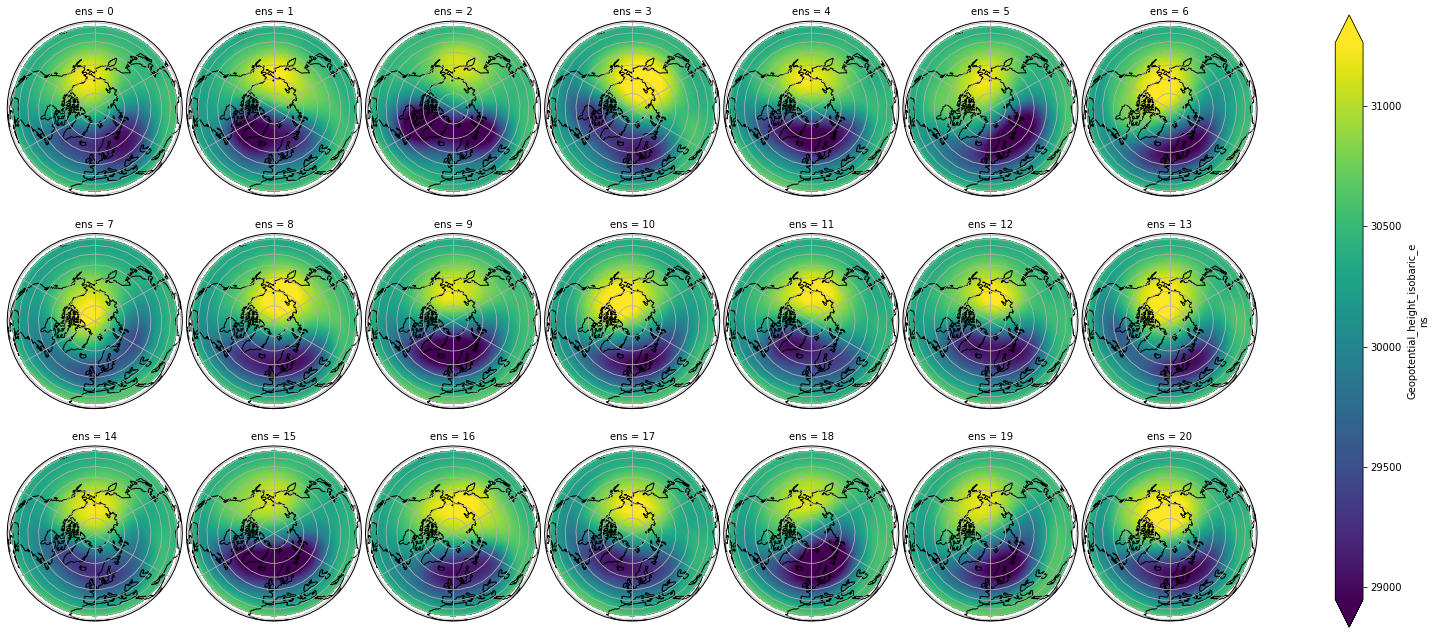

In [13]:
p = ds_h_sel_daily[-1].plot(col = 'ens', col_wrap = 7,\
                        transform=ccrs.PlateCarree(), robust = True,\
                        subplot_kws={'projection': ccrs.Orthographic(0, 90)})
for ax in p.axes.flat:
    ax.coastlines()
    ax.gridlines()

## all forecast times (daily)

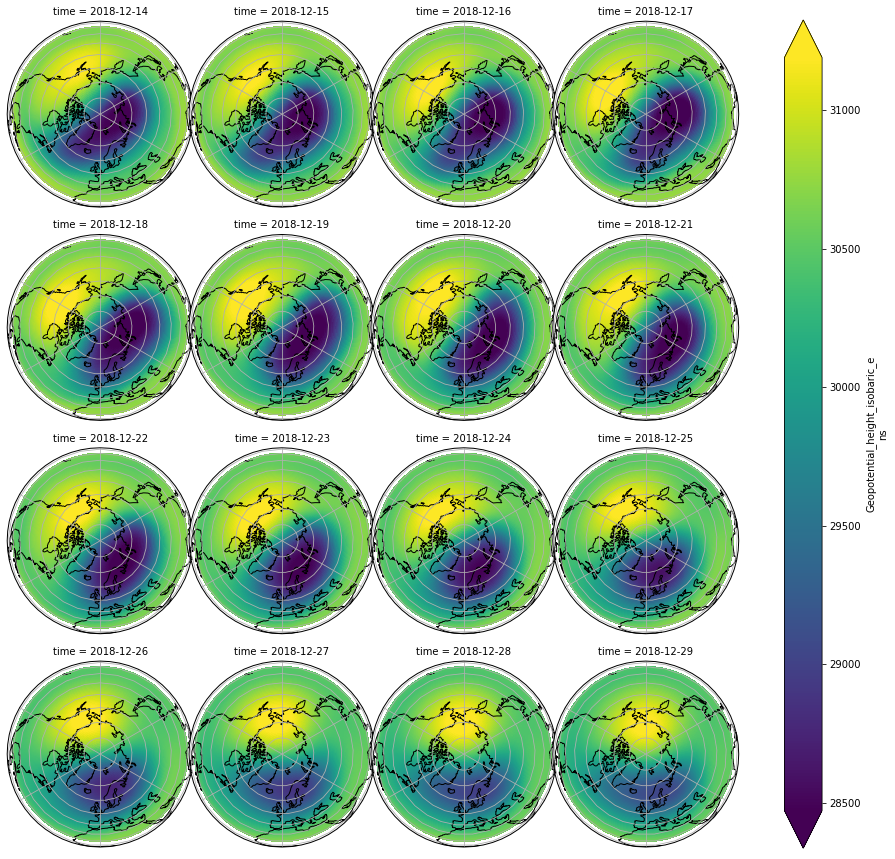

In [14]:
p = ds_h_sel_daily.mean('ens').plot(col = 'time', col_wrap = 4,\
                        transform=ccrs.PlateCarree(), robust = True, \
                        subplot_kws={'projection': ccrs.Orthographic(0, 90)})
for ax in p.axes.flat:
    ax.coastlines()
    ax.gridlines()

## individual figures

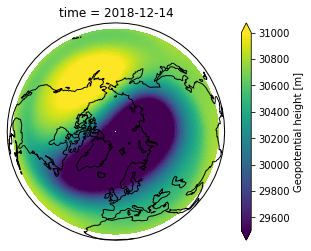

In [15]:
ax = plt.axes(projection=ccrs.Orthographic(0, 90))

ds_h_sel_daily[0].mean('ens').plot(ax=ax, transform=ccrs.PlateCarree(), \
                                   vmax = 31000, vmin = 29500, \
                                   cbar_kwargs=dict(label = 'Geopotential height [m]'));
ax.set_global(); ax.coastlines();
#plt.savefig('GH_GEFS_init2018121006_fd00.png', dpi=300, bbox_inches='tight')

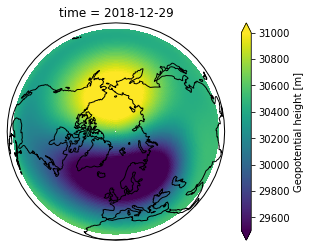

In [16]:
ax = plt.axes(projection=ccrs.Orthographic(0, 90))

ds_h_sel_daily[-1].mean('ens').plot(ax=ax, transform=ccrs.PlateCarree(), \
                                    vmax = 31000, vmin = 29500,\
                                    cbar_kwargs=dict(label = 'Geopotential height [m]'));
ax.set_global(); ax.coastlines();
#plt.savefig('GH_GEFS_init2018121006_fd16.png', dpi=300, bbox_inches='tight')

# Vortex-moments calculation

In [17]:
A = 6374.0e3       # Earth radius
DEGRAD = np.pi/180. # conversion of degrees to radians
RADDEG = 180./np.pi # conversion of radians to degrees 

#optimized
def sph_to_car(field, lons, lats, xypoints,resolution):
    nlons = len(lons)
    nlats = len(lats)
    xyvals = []
    for ilon in range(nlons): # -1s needed?
        for ilat in range(nlats):
            xyvals.append(field[ilat,ilon])

    if resolution == 'full':       
        cart_x_points = -1.+np.arange(nlons)/(0.5*nlons)             
        cart_y_points = -1.+np.arange(nlons)/(0.5*nlons)
    elif resolution == 'low':
        cart_x_points = -1.+np.arange(50)/(0.5*50)
        cart_y_points = -1.+np.arange(50)/(0.5*50)
    else:
        raise ValueError()
    
    cart_gridx, cart_gridy = np.meshgrid(cart_x_points,cart_y_points)

    field_cart = griddata(xypoints, np.array(xyvals), (cart_gridx,cart_gridy), \
                        method='linear')  # Might want to change to cubic etc?
                              
    return field_cart, cart_x_points, cart_y_points  
#the same
def isolate_vortex(field_cart, edge, field_type='GPH'):
    """
    Replace vortex into region (outside) equal to field on vortex edge, and 
    region (inside) with values of vortex. 
    For GPH vortex is less than surrounding, for PV it is greater. 
    """
    if field_type == 'GPH':
        field_cart[np.where(field_cart > edge)] = edge
        field_cart[np.isnan(field_cart)] = edge # set NaN regions to edge 
    elif field_type == 'PV':
        field_cart[np.where(field_cart < edge)] = edge
        field_cart[np.isnan(field_cart)] = edge # set NaN regions to edge
    else:
        raise ValueError() # maybe want more specific error type

    return field_cart

def moment_integrate2(vtx_field, x, y,edge):
    """
    Performs moment diagnostic calculations on cartesian field
    """

    # x and y are cartesian gridpoints; vtx_field is cartesian field
    # edge is value on vortex edge 

    box_length = 2*A/len(x)
    box_area = box_length**2

    # Set up moment diagnostics
    M00 = 0
    M10 = 0
    M01 = 0
    Marea = 0
    # Integrate over vortex
          
    M00 = np.sum(np.abs(vtx_field-edge)*(x[:,np.newaxis]**0)*(y[np.newaxis,:]**0))
    M10 = np.sum(np.abs(vtx_field-edge)*(x[:,np.newaxis]**1)*(y[np.newaxis,:]**0))
    M01 = np.sum(np.abs(vtx_field-edge)*(x[:,np.newaxis]**0)*(y[np.newaxis,:]**1))
    Marea = np.sum(np.abs(vtx_field-edge)*(x[:,np.newaxis]**0)*(y[np.newaxis,:]**0)*box_area)
            
    # Calculate centroid 
    centx = M10/M00
    centy = M01/M00

    # Convert back to polar coordinates 
    R = centx**2 + centy**2
    latcent = np.arcsin((1-R)/(1+R))*RADDEG
    
    # Set up relative moment diagnostics 
    J11=0
    J20=0
    J02=0
    J11 = np.sum(np.abs(vtx_field-edge)*((x[:,np.newaxis]-centx)**1)*((y[np.newaxis,:]-centy)**1))
    J20 = np.sum(np.abs(vtx_field-edge)*((x[:,np.newaxis]-centx)**2)*((y[np.newaxis,:]-centy)**0))
    J02 = np.sum(np.abs(vtx_field-edge)*((x[:,np.newaxis]-centx)**0)*((y[np.newaxis,:]-centy)**2))
    aspect_ratio = np.sqrt(abs(( (J20+J02) + np.sqrt(4*(J11**2)+(J20-J02)**2) ) / \
                               ( (J20+J02) - np.sqrt(4*(J11**2)+(J20-J02)**2) ))) 
    return aspect_ratio, latcent

def calc_moments(field, lats, lons, xypoints, hemisphere='NH', field_type='GPH', \
                 edge=3.02e4, resolution='full'):
    field_cart, x, y = sph_to_car(field,lons,lats,xypoints,resolution)
    field_vtx = isolate_vortex(field_cart, edge, field_type)
   
    aspect_ratio, latcent = moment_integrate2(field_vtx, x, y,edge)
        
    return {'aspect_ratio':aspect_ratio, 'centroid_latitude':latcent}
                 
def calc_xypoints(lons, lats):
    DEGRAD = np.pi/180.
    lons = lons * DEGRAD
    lats = lats * DEGRAD
    x = (np.cos(lons[:,np.newaxis])*np.cos(lats))/ (1. + np.sin(lats[np.newaxis,:]))               
    y = (np.sin(lons[:,np.newaxis])*np.cos(lats[np.newaxis,:]))/(1. + np.sin(lats[np.newaxis,:]))
    nlon_nlat = lons.shape[0]*lats.shape[0]
    xypoints = np.stack([x.reshape(nlon_nlat),y.reshape(nlon_nlat)], axis = 1)
    return xypoints
                 
def moments_fce(arr):
    moments = calc_moments(arr,lats,lons,xypoints,'NH','GPH',3.02e4)
    return np.array([moments['aspect_ratio'], moments['centroid_latitude']])

In [18]:
lons = ds_h_sel_daily.lon.values
lats = ds_h_sel_daily.lat.values
xypoints = calc_xypoints(lons,lats)

In [19]:
moments_xr = xr.apply_ufunc(moments_fce, ds_h_sel_daily.chunk({'time': 1}), \
                            input_core_dims=[['lat', 'lon']], \
                            output_core_dims=[['vars']], \
                            output_dtypes = [float], vectorize=True, \
                            dask = 'parallelized',\
                            output_sizes = dict(vars = 2)).compute()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in greater


In [20]:
moments_xr['vars'] = ['aspect_ratio', 'centroid_latitude']#.reset_coords()
moments_ds = moments_xr.to_dataset(dim = 'vars') #.reset_coords('vars')

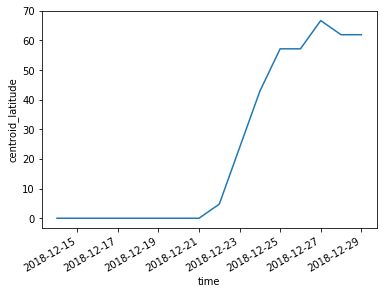

In [21]:
((moments_ds.centroid_latitude <= 66).sum('ens')/21*100.).plot()

<BarContainer object of 17 artists>

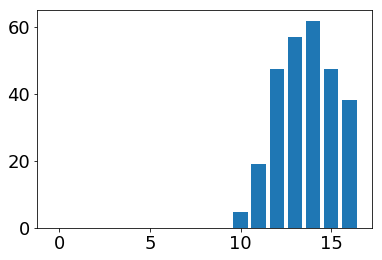

In [140]:
plt.bar(range(17), ((moments_ds.centroid_latitude <= 66).sum('ens')/21*100.))

Text(0, 0.5, 'Aspect ratio')

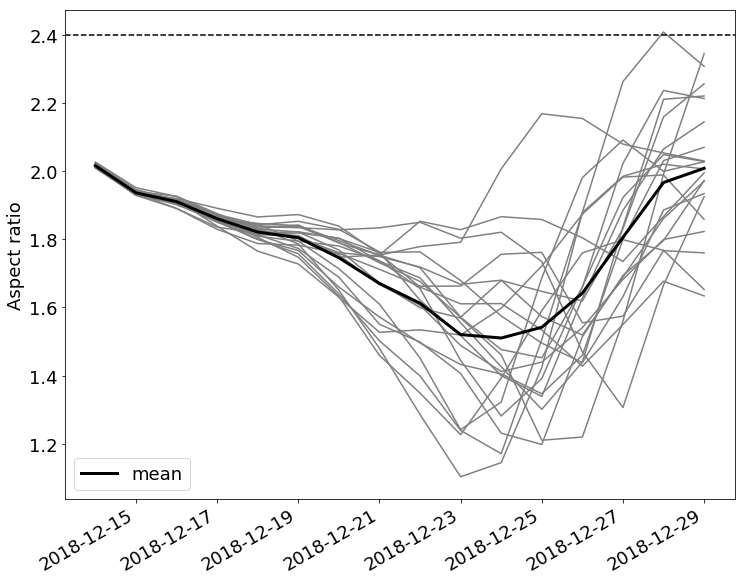

In [22]:
plt.rcParams.update({'font.size': 18})

fig = plt.figure(figsize=(12,9))
p1 = moments_ds.aspect_ratio.plot.line(hue = 'ens', add_legend = False, color = 'grey')
p2 = moments_ds.aspect_ratio.mean('ens').plot(color = 'k', linewidth = 3, label = 'mean')
plt.axhline(2.4, color='k', linestyle='--' )
plt.legend()
plt.xlabel('')
plt.ylabel('Aspect ratio')
#plt.title('Source: NCEP/GEFS model (init: 20181210-06)')
#plt.savefig('centr_latitude_GEFS_init20181210-06.png', dpi=300, bbox_inches='tight')

Text(0.5, 1.0, 'Source: NCEP/GEFS model (init: 20181210-06)')

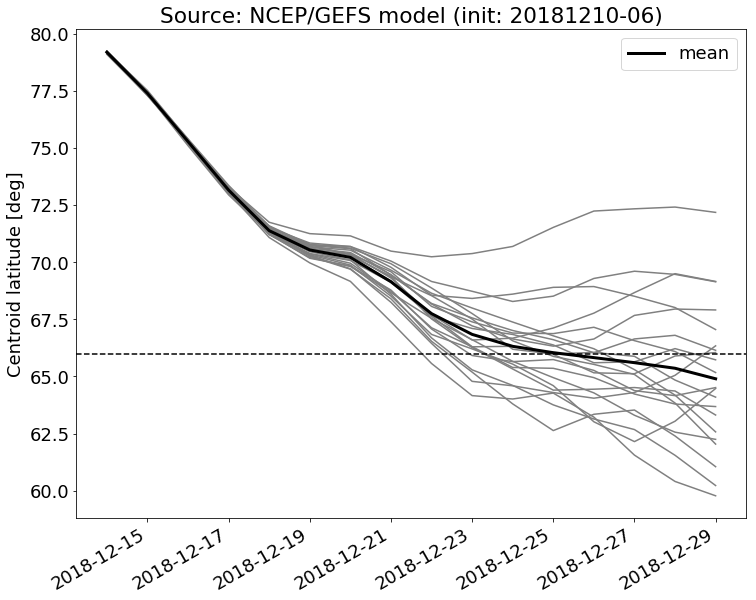

In [23]:
plt.rcParams.update({'font.size': 18})

fig = plt.figure(figsize=(12,9))
p1 = moments_ds.centroid_latitude.plot.line(hue = 'ens', add_legend = False, color = 'grey')
p2 = moments_ds.centroid_latitude.mean('ens').plot(color = 'k', linewidth = 3, label = 'mean')
plt.axhline(66, color='k', linestyle='--' )
plt.legend()
plt.xlabel('')
plt.ylabel('Centroid latitude [deg]')
plt.title('Source: NCEP/GEFS model (init: 20181210-06)')
#plt.savefig('centr_latitude_GEFS_init20181210-06.png', dpi=300, bbox_inches='tight')